# Baking with the Gemini API

To get started, [get an API key](https://g.co/ai/idxGetGeminiKey) and replace the word `TODO` below with your API key:

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()
API_KEY = os.getenv("API_KEY") # drop your API_KEY in .env

Once you're done, create a text prompt here:

In [4]:
prompt = 'Provide an example recipe for the baked goods in the image'

And load an image with PIL:

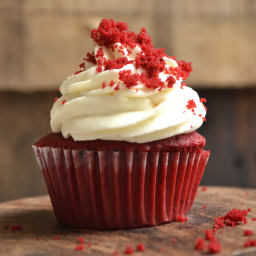

In [5]:
import PIL.Image
# img = PIL.Image.open('baked_goods_1.jpg')
# img = PIL.Image.open('baked_goods_2.jpg')
img = PIL.Image.open('baked_goods_3.jpg')
img

And finally, call the Gemini API using the Python client library. [See the docs](https://developers.generativeai.google/guide)

In [55]:
import google.generativeai as genai
from IPython.display import Markdown, clear_output, display

genai.configure(api_key=API_KEY)

model = genai.GenerativeModel(model_name='gemini-1.5-flash')  # or gemini-1.5-pro
response = model.generate_content([prompt, img], stream=True)

buffer = []
for chunk in response:
    for part in chunk.parts:
        buffer.append(part.text)
    clear_output()
    display(Markdown(''.join(buffer)))

That's a red velvet cupcake! Here's a recipe:

**Red Velvet Cupcakes**

**Yields:** 12 cupcakes
**Prep time:** 20 minutes
**Cook time:** 18-20 minutes


**Ingredients:**

**For the Cupcakes:**

* 1 1/2 cups (190g) all-purpose flour
* 1 1/2 teaspoons baking soda
* 1/2 teaspoon salt
* 1 cup (2 sticks) unsalted butter, softened
* 1 3/4 cups (350g) granulated sugar
* 2 large eggs
* 2 teaspoons vanilla extract
* 1 cup (240ml) buttermilk
* 2 tablespoons red food coloring (gel or liquid)
* 2 tablespoons white vinegar


**For the Cream Cheese Frosting:**

* 8 ounces (225g) cream cheese, softened
* 1 cup (2 sticks) unsalted butter, softened
* 3-4 cups (375-500g) powdered sugar
* 1 teaspoon vanilla extract
* Pinch of salt


**Instructions:**

**Cupcakes:**

1. **Preheat oven to 350°F (175°C).** Line a 12-cup muffin tin with paper liners.
2. **Whisk dry ingredients:** In a medium bowl, whisk together flour, baking soda, and salt.
3. **Cream butter and sugar:** In a large bowl, cream together the softened butter and sugar until light and fluffy.  Use an electric mixer for best results.
4. **Add eggs and vanilla:** Beat in eggs one at a time, then stir in the vanilla extract.
5. **Combine wet ingredients:** In a small bowl, whisk together the buttermilk, red food coloring, and vinegar.
6. **Alternately add dry and wet ingredients:** Gradually add the dry ingredients to the wet ingredients, alternating with the buttermilk mixture, beginning and ending with the dry ingredients. Mix until just combined. Do not overmix.
7. **Fill cupcake liners:** Fill each cupcake liner about 2/3 full.
8. **Bake:** Bake for 18-20 minutes, or until a toothpick inserted into the center comes out clean.
9. **Cool:** Let cupcakes cool in the muffin tin for a few minutes before transferring them to a wire rack to cool completely.


**Cream Cheese Frosting:**

1. **Beat cream cheese and butter:** In a large bowl, beat together the softened cream cheese and butter until smooth and creamy.
2. **Add powdered sugar:** Gradually add the powdered sugar, one cup at a time, beating well after each addition.
3. **Add vanilla and salt:** Stir in the vanilla extract and salt. Add more powdered sugar if needed to reach desired consistency.
4. **Frost cupcakes:** Once the cupcakes are completely cool, frost them with the cream cheese frosting.  You can also sprinkle some crushed red velvet cake crumbs on top for decoration.


**Tips and Variations:**

* For a more intense red color, use gel food coloring.
* If you don't have buttermilk, you can make a substitute by adding 2 tablespoons of white vinegar or lemon juice to 1 cup of milk. Let it sit for 5 minutes before using.
* For a richer flavor, use good quality cocoa powder in addition to the food coloring.  A small amount (1-2 tablespoons) will enhance the red velvet flavor.
* Get creative with your frosting!  Try adding chocolate chips, sprinkles, or other toppings.


Enjoy your delicious homemade red velvet cupcakes! Remember to adjust baking time depending on your oven.  Start checking for doneness around 18 minutes.


In [56]:
def summarize_file(file_path, hints=None):
    """
    Summarizes the content of a given file using a Google Gemini model.

    Args:
        file_path (str): The path to the file to summarize.
        hints (str, optional): Optional hints or instructions to guide the summarization.
            Defaults to None.

    Returns:
        str: The generated summary of the file content.
    """

    try:
        with open(file_path, "r") as file:
            file_content = file.read()

        # Construct the prompt with optional hints
        prompt = f"Please summarize the content of the following text:\n\n"
        if hints:
            prompt += f"\n\nHints: {hints}"

        model = genai.GenerativeModel(model_name='gemini-1.5-flash')  # or gemini-1.5-pro
        response = model.generate_content([prompt, file_content], stream=False)
        
        # Generate the summary using the Gemini model
        # response = model.generate_content(
        #     # model="models/gemini-pro",  # Choose your preferred model
        #     prompt=prompt,
        #     max_length=2560,  # Adjust as needed
        #     temperature=0.7,  # Adjust for creativity
        # )
        summary = response.text

        return response

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}", hints="Render as markdown with appropriate headings.")
        return None

    except Exception as e:
        print(f"Error: {e}")
        return None


In [62]:
summary = summarize_file(
    "rni_atharva_2.txt" , 
    hints='''
    Format as a markdown with appropriate headings and subheadings.
    S. Subramanya (Sudhee) is in conversation with Professor R N Iyengar (RNI)
    Use IAST where needed.  Agastya is the southern star.
    Vṛddha Gārgiya Jyotishā (VGJ) by  "Gārga school" and Pārashara Tantra (PT) by "Pārashara school" are works of ancient astronomers
    Lagadha's work is about calendar algorithms.
    Brahmānda Purāṇa (BP) , Maitrayañi Āraṇyaka Upaniṣad (MAU) are vedic works with astrnomincal information 
    Mahāsalilam , Ādityacārā, Ṛtusvābhāva are important chapters of Vṛddha Gārgiya Jyotishā
    Add a section on dating methods.
    Add a section on Epochs discussed with time line bands - namely Maghādi, Śraviṣṭādi, Ṛtusvābhāva.
    Add a section of different authors and works discussed in the talk. 
    Use BCE and CE notation
    '''
)


In [63]:
from IPython.display import Markdown, display
display(Markdown(summary.text))


# A Conversation on Pre-Siddhānta Astronomy in India

This document summarizes a conversation between S. Subramanya (Sudhee) and Professor R.N. Iyengar (RNI) about pre-Siddhānta astronomy in India.  The conversation focuses on the transition of astronomical knowledge from the Vedic period to later astronomical texts.

## Vedic Skies and Early Observations (c. 4th Millennium BCE and earlier)

The conversation begins by recapping the previous episode, which discussed Vedic observations of the sky, including the sun, moon, and constellations. RNI emphasizes that early Vedic observations were likely disrupted by events like cometary impacts or storms, spurring more careful celestial observation and influencing the development of cosmology. The concept of *dhruva* (the pole star) and its significance in Vedic astronomy is discussed, placing these observations around the 3rd millennium BCE.  The *meṣa* model, an early representation of the celestial sphere, is also mentioned as originating in this period.

## The Gap Between Vedic and Siddhānta Astronomy

A major focus of the discussion is the gap between these early Vedic observations and the later Siddhānta tradition.  The question arises: what astronomical knowledge was developed between the 3rd millennium BCE and the emergence of texts like Lāṭadeva's work (c. 1300 BCE)?  Lāṭadeva's *Jyotiṣa* focuses primarily on calendar algorithms and doesn't cover planets, eclipses, or comets, leaving a significant gap in understanding the progression of astronomical knowledge.

## Pārāśara and the Pārāśara Tantram (c. 2500-2600 BCE)

The conversation then turns to the *Pārāśara Tantram*, attributed to Pārāśara, a much older text. RNI explains that his research on the *Pārāśara Tantram*, based on quotations from later commentators like Utpala and Balabhaṭṭa, reveals a list of 26 comets and their inter-arrival times, spanning approximately 1200-1300 years. This suggests an astronomical tradition stretching back to around 2500-2600 BCE.  Pārāśara's work utilizes a solar zodiac based on seasons, rather than months or *rāśis* (zodiacal signs), reflecting a continuity with Vedic concepts.  The use of the winter solstice as a starting point for the year, shared with Lāṭadeva, is noted. The dating of Pārāśara is debated, but RNI's analysis points towards a much earlier date than previously suggested.

## Vṛddha Gārgiya Jyotiṣa and the Gārga School (c. 1600 BCE - 500 BCE)

The conversation moves to the *Vṛddha Gārgiya Jyotiṣa* (*VGJ*) and the Gārga school.  RNI discusses his research on numerous manuscripts of *VGJ*, revealing a vast body of astronomical material. He mentions the *Mahāśalilam* chapter as a particularly important section, containing a solar zodiac similar to that of Pārāśara and detailing the composition of *nakṣatras* (lunar mansions).  The *Ṛtusvābhāva* chapter provides a more detailed seasonal description than Pārāśara, indicating a progression in astronomical sophistication.  Dating of *VGJ*, based on minimum error analysis of the *nakṣatra* positions and stellar configurations, suggests a range between 1600 BCE and 500 BCE. The *Mahāśalilam*, specifically, is placed around 1600 BCE.  The text also discusses the sidereal period of the moon and uses a concept of "instantaneous time" (*tithi*) for the full moon (*pūrṇimā*).  RNI highlights the *VGJ*'s discussion of the *Agastya* star, visible only in the southern hemisphere, and its significance in establishing a timeline.  The *Agastya* star's visibility in the Kurukshetra region is used to date certain observations to around 4000 BCE.


## Dating Methods

The dating methods employed involve several approaches:

* **Cometary records:** Using the inter-arrival times of comets recorded in the *Pārāśara Tantram*.
* **Minimum error analysis:** Comparing the described positions of stars and constellations with their calculated positions across millennia to identify the time of minimum error, suggesting the most likely time of observation.
* **Equinox and solstice positions:** Utilizing the positions of equinoxes and solstices described in texts like the *Brahmāṇḍa Purāṇa* to constrain possible dates.
* **Visibility of southern stars:**  The visibility of stars like *Agastya* at particular latitudes helps constrain the geographical location and timeframe of observations.

## Epochs and Timelines

The conversation mentions several epochs, marking significant shifts in astronomical knowledge:

* **Maghadī:**  Associated with the time when the summer solstice was in the *Magha nakṣatra*. This period is connected to the *Mahāśalilam* and the *Brahmāṇḍa Purāṇa*.  Dating through minimum error analysis suggests a range of 1800 BCE - 1600 BCE.
* **Śraviṣṭhādi:**  Less explicitly defined, but related to the use of *Śraviṣṭhā* as a significant constellation.
* **Ṛtusvābhāva:**  Referencing a system of defining the year based on the seasonal progression of the sun through constellations. This system is evident in the *VGJ*.

## Authors and Works Discussed

The conversation focuses on the following authors and works:

* **Vedic Samhitas, Brāhmaṇas, and Āraṇyakas:**  Early Vedic texts containing astronomical observations.
* **Lāṭadeva's Jyotiṣa:**  A work focused on calendar algorithms (c. 1300 BCE).
* **Pārāśara Tantram:**  A treatise containing a list of comets and a seasonal zodiac (c. 2500-2600 BCE).
* **Vṛddha Gārgiya Jyotiṣa (VGJ):**  A collection of texts from the Gārga school, including chapters like *Mahāśalilam* and *Ṛtusvābhāva*.  (c. 1600 BCE - 500 BCE).
* **Brahmāṇḍa Purāṇa and Maitrāyaṇī Āraṇyaka Upaniṣad:**  Later Vedic texts containing astronomical information, used for dating.

## Conclusion

The conversation concludes with the assertion that this research significantly alters our understanding of the development of Indian astronomy.  It reveals a rich and continuous tradition of astronomical observations and knowledge development spanning millennia, extending far beyond the commonly understood Siddhānta period. The detailed analysis of the *VGJ* manuscripts, specifically the *Mahāśalilam*, promises to unveil a wealth of knowledge from the pre-Siddhānta era.  The discussion stresses the importance of analyzing ancient texts critically and holistically, paying close attention to cultural context and linguistic nuances to avoid misinterpretations and gaps in understanding.


In [ ]:
summary.usage_metadata

prompt_token_count: 15595
candidates_token_count: 1375
total_token_count: 16970

In [ ]:
summary

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "This is a conversation between a host and Professor Arangar, discussing the history of Indian astronomy, particularly focusing on pre-Siddh\u0101nta astronomy (before the classical Indian astronomical texts).  The discussion centers on bridging the gap in understanding between Vedic observations (circa 4th millennium BCE or earlier) and later astronomical texts.\n\nProfessor Arangar highlights the following:\n\n* **Vedic period astronomical observations:**  The Vedas contained detailed observations of celestial bodies, eclipses, comets, and meteors.  These observations were likely spurred by disruptive events like comets or storms.\n\n* **The gap between Vedic and later astronomical texts:**  A significant gap exists in the written record between Vedic texts